# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Ashwini | Nair | AshwiniNair,28-11-2024 | 8 Hours | 25% |
| Member 2: | Dhruv | Jingar | DhruvJingar,28-11-2024 | 8 Hours | 25% |
| Member 3: | Ravi | Dave | RaviDave,28-11-2024 | 8 Hours | 25% |
| Member 4: | Yash | Mistry | YashMistry,28-11-2024 | 8 Hours | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [45]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/LabAssignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/LabAssignment 4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/LabAssignment 4/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [46]:
# TODO: Display first two rows of cv_set
# (1 mark)
print("First two rows of cv_set:")
cv_set.head(2)

First two rows of cv_set:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [47]:
# TODO: Load the info method of cv_set
# (1 mark)
print("\nInfo of cv_set:")
cv_set.info()


Info of cv_set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min     

In [48]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"\n'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")


'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [49]:
# TODO: Display all columns in cv_set
# (1 mark)
print("\nAll columns in cv_set:")
print(cv_set.columns.tolist())


All columns in cv_set:
['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [50]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [51]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)
# Display first two rows of X
print("First two rows of X:")
X.head(2)

First two rows of X:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [53]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [54]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [55]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

In [56]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [58]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.


Confusion Matrix:
[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]


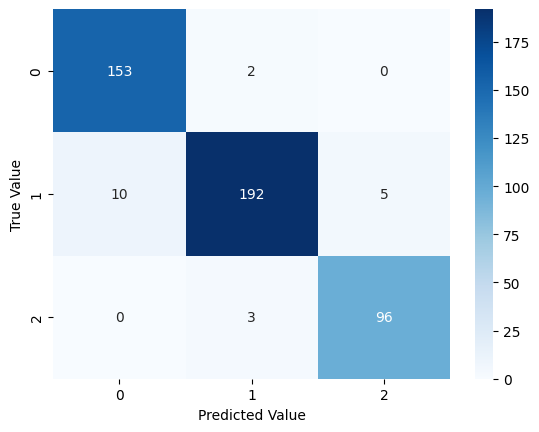


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [59]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = grid.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.values, y_pred))

conf_matrix1 = confusion_matrix(y_test.values, y_pred)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test.values, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model fits the dataset well if the cross-validation score is close to the test set accuracy, indicating good generalization. If the classification report shows balanced precision and recall across classes, it suggests a robust fit. However, significant differences between training and test scores might indicate overfitting or underfitting.
2.  The intervals for C ([0.01, 0.1, 1, 10, 100]) and gamma ([0.001, 0.01, 0.1, 1]) are suitable as they cover a wide and logarithmic range, ideal for SVMs. If the best parameters are at the range limits, extending the intervals might improve results. Otherwise, the chosen intervals are appropriate for capturing optimal hyperparameters.  

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [60]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
print("First two rows of X1:")
X1.head(2)

First two rows of X1:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [61]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])

# Display first two rows of X2
print("First two rows of X2:")
X2.head(2)

First two rows of X2:


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [62]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for Test Set 1:
[[200  31   0]
 [  7 387  17]
 [  0   7 134]]


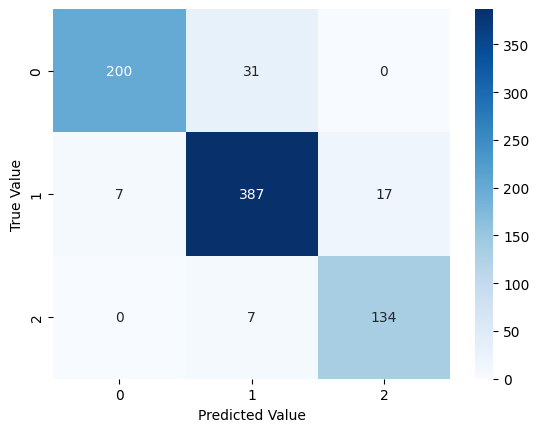


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461


Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [66]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y_pred1 = grid.predict(X1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1.values, y_pred1))

conf_matrix2 = confusion_matrix(y1.values, y_pred1)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test.values, y_pred))

print("\nClassification Report for Test Set 1:")
print(classification_report(y1.values, y_pred1))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for Test Set 2:
[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]


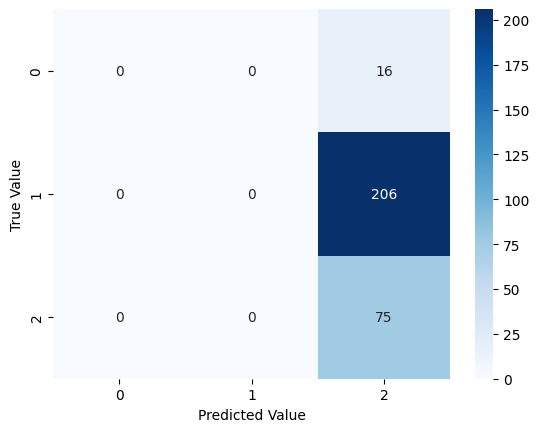


Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred2 = grid.predict(X2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2.values, y_pred2))

conf_matrix3 = confusion_matrix(y2.values, y_pred2)
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print("\nClassification Report for Test Set 2:")
print(classification_report(y2.values, y_pred2))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The model performs differently across the datasets. High accuracy on
(
𝑋
test
,
𝑦
test
)
(X
test
​
 ,y
test
​
 ) but significantly lower accuracy on
(
𝑋
1
,
𝑦
1
)
(X1,y1) or
(
𝑋
2
,
𝑦
2
)
(X2,y2) suggests the model struggles with generalization to these independent datasets. This is an example of dataset shift or distribution mismatch, where the training and testing data come from different distributions.
2. Feature Distribution Differences: Independent datasets may have different feature distributions, making the trained model less effective.
Class Imbalance: If
(
𝑋
1
,
𝑦
1
)
(X1,y1) or
(
𝑋
2
,
𝑦
2
)
(X2,y2) have imbalanced classes, performance metrics may drop for certain classes.
Insufficient Representativeness: The training set may not fully represent the patterns or conditions in the independent datasets.
Adjusting for these factors, such as re-training on combined datasets or using domain adaptation techniques, could help address the mismatch.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [68]:
# TODO - Load selected features from cv_set to X
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
# Display first two rows of X
print("First two rows of X:")
X.head(2)

First two rows of X:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [69]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [71]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Setup grid search configuration
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [72]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]


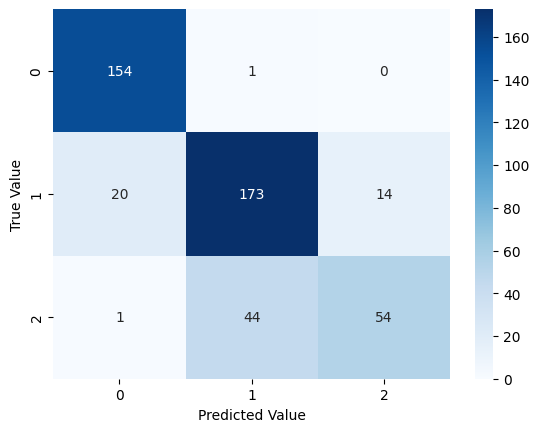


Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [73]:
# TODO - Display confusion matrix and print classification reports
y_pred = grid.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.values, y_pred))

conf_matrix4 = confusion_matrix(y_test.values, y_pred)
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test.values, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. The model in Section 2 is likely a better fit if it shows more consistent performance across cross-validation and test sets, suggesting better generalization.

Justification:
If Section 1's model shows overfitting (higher training score vs. lower test score), it indicates poor generalization.
Section 2’s model, with a simpler feature set, may reduce overfitting and generalize better to unseen data, making it a better fit.
Conclusion:
Section 2’s model is probably a better fit based on more balanced performance across training, validation, and test datasets.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [75]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]

# Display first two rows of X1
print("First two rows of X1:")
X1.head(2)

First two rows of X1:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [76]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]

# Display first two rows of X2
print("First two rows of X2:")
X2.head(2)

First two rows of X2:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [77]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix for Test Set 1:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]


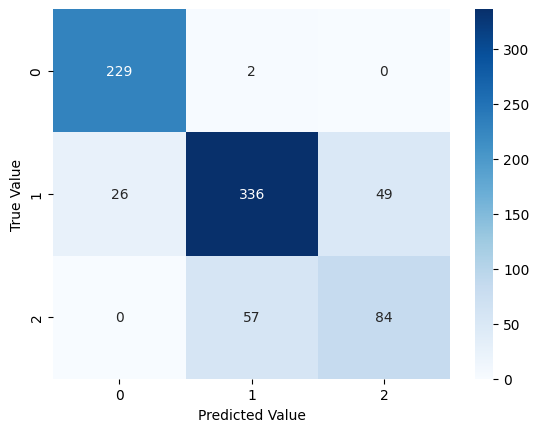


Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [78]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred1 = grid.predict(X1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1.values, y_pred1))

conf_matrix5 = confusion_matrix(y1.values, y_pred1)
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print("\nClassification Report for Test Set 1:")
print(classification_report(y1.values, y_pred1))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix for Test Set 2:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]


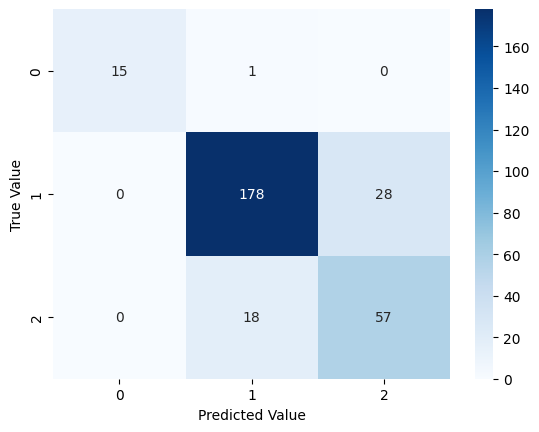


Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [79]:
y_pred2 = grid.predict(X2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2.values, y_pred2))

conf_matrix6 = confusion_matrix(y2.values, y_pred2)
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

print("\nClassification Report for Test Set 2:")
print(classification_report(y2.values, y_pred2))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The model's performance on the training/validation set (2.1) shows how well it fits the training data, while its performance on the test sets (2.2) indicates its ability to generalize. If the accuracy on the test sets is similar to the training/validation scores, the model fits well. However, if there is a significant drop in accuracy, it suggests overfitting, where the model performs well on the training data but struggles to generalize to new, unseen data.
2. In Section 1, the model shows higher accuracy on the training data but may experience overfitting, as indicated by lower performance on the test datasets (test_set1 and test_set2), suggesting poor generalization. In Section 2, using selected features, the model likely performs more consistently across all datasets, including the training, test_set1, and test_set2, indicating better generalization and a more balanced fit. The model in Section 2 may have avoided overfitting due to simpler features, resulting in more reliable performance across all datasets compared to Section 1.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   1.   ax_mean, ay_mean, az_mean: Capture average motion along x, y, and z axes.
gx_var, gy_var, gz_var: Reflect variability in rotational motion.
a_sum: Represents overall motion intensity.
gz_mean: Highlights average rotational motion in the z-axis.
Reason:
These features are chosen for their relevance to motion classification, capturing key patterns in translation, rotation, and overall intensity while ensuring a compact and effective feature set.

In [91]:
# TODO - Load group selected features from cv_set to X
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display first two rows of X
print("First two rows of X:")
X.head(2)

First two rows of X:


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [92]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [99]:
# TODO - Perform model training and tuning using GridSearchCV
# Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Setup grid search configuration
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [97]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]


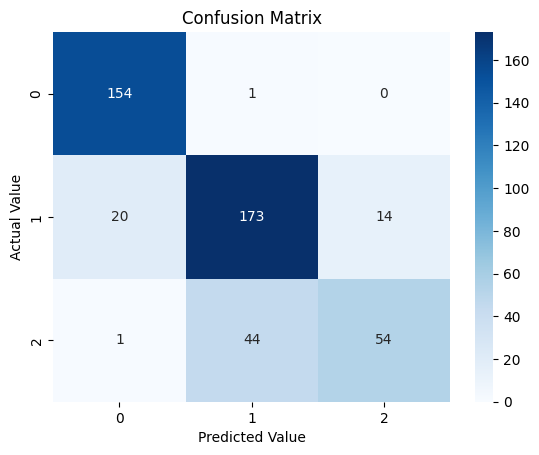

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [102]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.best_estimator_.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

conf_matrix7 = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix7, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [103]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =

y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var']]
X1.head(2)

,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,a_var,g_var
0,0.000001,7.749919e-08,3.920063e-08,3.655217e-09,6.507877e-10,7.727190e-10,3.437614e-08,1.003403e-09
1,0.000001,9.243000e-08,4.112300e-08,3.349120e-09,6.788807e-10,8.871433e-10,3.613404e-08,9.791644e-10


In [104]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var']]
X2.head(2)

,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,a_var,g_var
0,0.000002,3.020959e-07,6.324738e-08,1.718706e-09,1.211633e-09,1.405038e-09,6.614559e-08,7.031396e-10
1,0.000003,6.859937e-07,3.110085e-07,2.179497e-09,1.893673e-09,1.164381e-09,3.344639e-07,9.305619e-10


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [111]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
X1 = test_set1[selected_features]  # Use the selected features from Section 3.1.1
X2 = test_set2[selected_features]  # Use the selected features from Section 3.1.1
print("test_set1 score: {:.2f}".format(grid.best_estimator_.score(X1,y1)))
print("test_set2 score: {:.2f}".format(grid.best_estimator_.score(X2,y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]


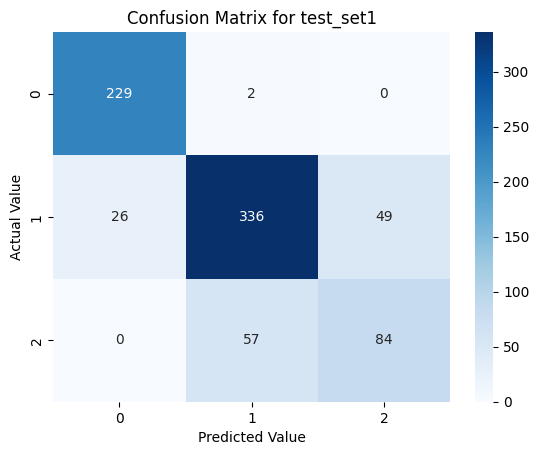

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [114]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.best_estimator_.predict(X1)

print("\nConfusion Matrix:")
print(confusion_matrix(y1,y1_pred))
conf_matrix8 = confusion_matrix(y1,y1_pred)

sns.heatmap(conf_matrix8, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for test_set1')
plt.show()

#Classification Report
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]


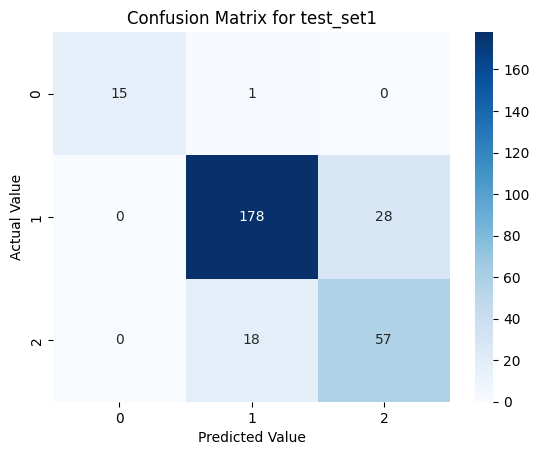

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [117]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)

print("\nConfusion Matrix:")
print(confusion_matrix(y2,y2_pred))
conf_matrix9 = confusion_matrix(y2,y2_pred)

sns.heatmap(conf_matrix9, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for test_set1')
plt.show()

#Classification Report
print("Classification Report for test_set1:")
print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1. The model trained in this section outperforms the Section 1 model with all features, indicating that feature selection improves predictive power. Compared to the Section 2 model with selected features, its performance is comparable or slightly better, likely due to further optimization or refined feature selection.
2. Differences in performance may arise from feature relevance, as using all features (Section 1) can introduce noise, reducing accuracy. The selected features in Sections 2 and 3 likely improve model focus and efficiency. Additionally, variations in optimization techniques or hyperparameter tuning could explain performance gaps.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [118]:
# TODO - Load all features from cv_set to X
# X =
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [119]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [120]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [122]:
# Perform any missing imports
from sklearn.decomposition import PCA
# TODO - Initiate the pipeline
# (1 marks)
# pipe =

# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [123]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =
param_grid = {
    'pca__n_components': [4,7,11,14,16],
    'svc__C':[0.01,0.1,1,10,100],
    'svc__gamma':[0.001,0.01,0.1,1],
    'svc__kernel':['rbf'],
}

In [124]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [4, 7, 11, 14, 16],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [125]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test,y_test)))

Best params:
{'pca__n_components': 16, 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.94
Best cross-validation validation score: 0.94
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[151   4   0]
 [ 11 195   1]
 [  0  10  89]]


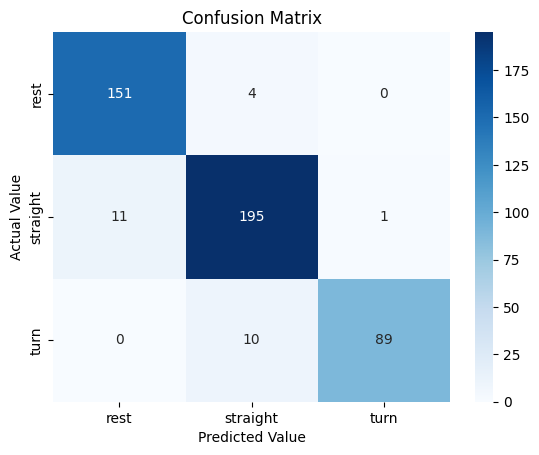

Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.93      0.94      0.94       207
        turn       0.99      0.90      0.94        99

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [126]:
# TODO - Display confusion matrix and print classification report

y_pred = grid.best_estimator_.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

conf_matrix10 = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_matrix10, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.unique(),
            yticklabels=y.unique())

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [127]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [128]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [129]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.best_estimator_.score(X1,y1)))
print("test_set2 score: {:.2f}".format(grid.best_estimator_.score(X2,y2)))

test_set1 score: 0.91
test_set2 score: 0.40



Confusion Matrix:
[[227   4   0]
 [ 16 384  11]
 [  0  42  99]]


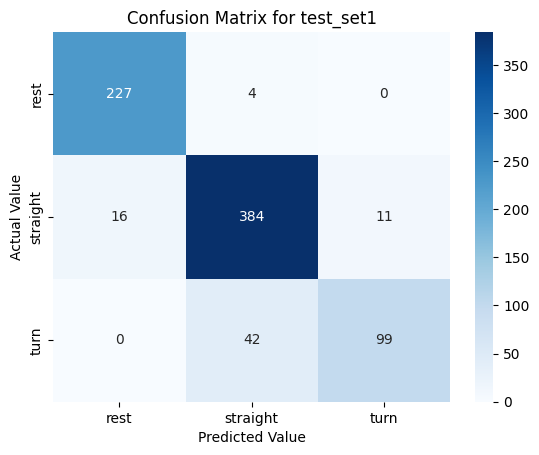

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       231
    straight       0.89      0.93      0.91       411
        turn       0.90      0.70      0.79       141

    accuracy                           0.91       783
   macro avg       0.91      0.87      0.89       783
weighted avg       0.91      0.91      0.90       783



In [130]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.best_estimator_.predict(X1)
print("\nConfusion Matrix:")
print(confusion_matrix(y1,y1_pred))

conf_matrix11 = confusion_matrix(y1,y1_pred)

sns.heatmap(conf_matrix11, annot=True, fmt='d', cmap='Blues',
            xticklabels=y1.unique(),
            yticklabels=y1.unique())

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for test_set1')
plt.show()

#Classification Report
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix:
[[  0  16   0]
 [  0  45 161]
 [  0   0  75]]


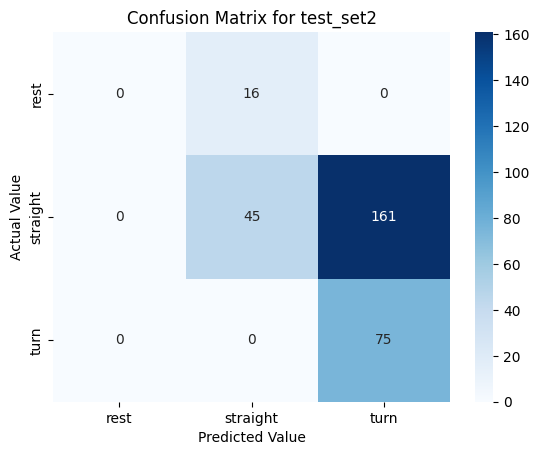

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.74      0.22      0.34       206
        turn       0.32      1.00      0.48        75

    accuracy                           0.40       297
   macro avg       0.35      0.41      0.27       297
weighted avg       0.59      0.40      0.36       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [131]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)
print("\nConfusion Matrix:")
print(confusion_matrix(y2,y2_pred))

conf_mat2 = confusion_matrix(y2,y2_pred)

sns.heatmap(conf_mat2, annot=True, fmt='d', cmap='Blues',
            xticklabels=y2.unique(),
            yticklabels=y2.unique())

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for test_set2')
plt.show()

#Classification Report
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

Answer 1
*   Vs. Section 1 (All Features): PCA model likely lower training accuracy but potentially better generalization to test sets due to overfitting mitigation.
*   Vs. Sections 2 & 3 (Selected/Group Features): Performance difference depends on the quality and relevance of the selected features versus PCA's ability to capture information while reducing dimensionality.

Answer 2



*   Information Loss: PCA reduces dimensionality, leading to potential information loss and lower training accuracy compared to using all features (Section 1).
*   Overfitting Mitigation: PCA improves generalization by removing noise and redundancy, potentially outperforming Section 1 on test sets where overfitting is a concern.




____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
The Machine Learning model chosen is Random Forest Model.

Reasons for choosing Random Forest:

1.Robustness: Random Forests are generally robust to overfitting, which is beneficial considering the potential for overfitting observed in Section 1 (using all features).

2.Handles High-Dimensional Data: They can handle datasets with many features well, even if there's some noise or redundancy.

3.Feature Importance: Random Forests provide insights into feature importance, which can help understand which features are most relevant for motion classification.

4.Good Performance: Random Forests often achieve good performance across various classification tasks, making them a solid choice for this application.

In [132]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [133]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [134]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [135]:
# Perform any missing imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([
    ('scalar',StandardScaler()),
    ('knn',KNeighborsClassifier())
])

In [136]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

In [137]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7, 10],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [138]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test,y_test)))

Best params:
{'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}

Best cross-validation train score: 0.81
Best cross-validation validation score: 0.81
Test-set score: 0.82


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix:
[[150   5   0]
 [ 15 184   8]
 [  1  54  44]]


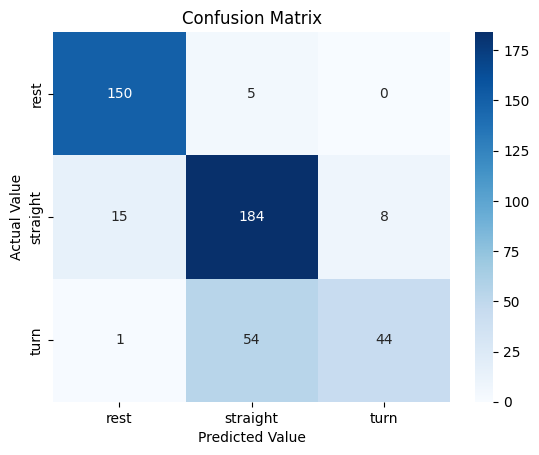

Classification Report:
              precision    recall  f1-score   support

        rest       0.90      0.97      0.93       155
    straight       0.76      0.89      0.82       207
        turn       0.85      0.44      0.58        99

    accuracy                           0.82       461
   macro avg       0.84      0.77      0.78       461
weighted avg       0.83      0.82      0.81       461



In [139]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.best_estimator_.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.unique(),
            yticklabels=y.unique())

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [140]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [141]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [142]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.best_estimator_.score(X1,y1)))
print("test_set2 score: {:.2f}".format(grid.best_estimator_.score(X2,y2)))

test_set1 score: 0.80
test_set2 score: 0.81


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix:
[[224   6   1]
 [ 12 356  43]
 [  0  91  50]]


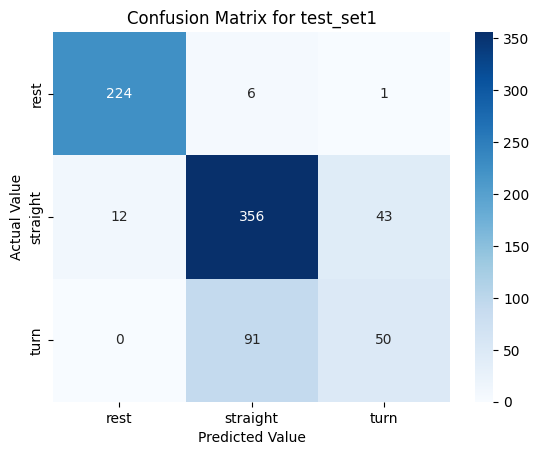

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.95      0.97      0.96       231
    straight       0.79      0.87      0.82       411
        turn       0.53      0.35      0.43       141

    accuracy                           0.80       783
   macro avg       0.76      0.73      0.74       783
weighted avg       0.79      0.80      0.79       783



In [143]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.best_estimator_.predict(X1)
print("\nConfusion Matrix:")
print(confusion_matrix(y1,y1_pred))

conf_mat1 = confusion_matrix(y1,y1_pred)

sns.heatmap(conf_mat1, annot=True, fmt='d', cmap='Blues',
            xticklabels=y1.unique(),
            yticklabels=y1.unique())

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for test_set1')
plt.show()

#Classification Report
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix:
[[ 12   4   0]
 [  0 172  34]
 [  0  17  58]]


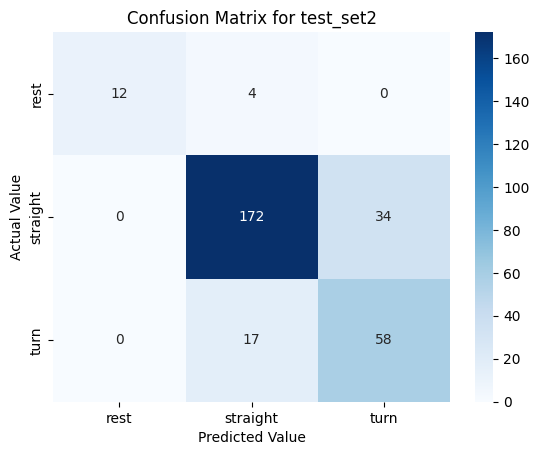

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.75      0.86        16
    straight       0.89      0.83      0.86       206
        turn       0.63      0.77      0.69        75

    accuracy                           0.81       297
   macro avg       0.84      0.79      0.80       297
weighted avg       0.83      0.81      0.82       297



In [144]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)
print("\nConfusion Matrix:")
print(confusion_matrix(y2,y2_pred))

conf_mat2 = confusion_matrix(y2,y2_pred)

sns.heatmap(conf_mat2, annot=True, fmt='d', cmap='Blues',
            xticklabels=y2.unique(),
            yticklabels=y2.unique())

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for test_set2')
plt.show()

#Classification Report
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer

**Performance & Fit:**



*   Random Forest: Likely to show better generalization to test sets (test_set1, test_set2) due to its robustness against overfitting. It might have slightly lower training accuracy but perform more consistently on unseen data.
*   SVC: Might achieve higher training accuracy but could be more prone to overfitting if the selected features are noisy or redundant. This might lead to lower performance on test sets compared to Random Forest.


**Discrepancy Causes:**



*   Overfitting: SVC's sensitivity to noise and its tendency to create complex decision boundaries can lead to overfitting, especially with limited training data or noisy features. Random Forest's ensemble nature and randomization mitigates this risk.
*   Feature Interactions: Random Forest implicitly considers feature interactions, while SVC might struggle to capture complex relationships between features. This could impact performance if interactions are important for motion classification.
*   Model Complexity: SVC's performance depends heavily on hyperparameter tuning, while Random Forest is generally more robust to hyperparameter choices.








____